In [47]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

# Load libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [48]:
df = pd.read_excel('../default_of_credit_card_clients.xls', header=0)

df.columns = df.iloc[0,:]

df = df.rename(index=str, columns={"default payment next month": "Y"})

df = df.drop('ID',  axis=0)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null object
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
PAY_6        30000 non-null object
BILL_AMT1    30000 non-null object
BILL_AMT2    30000 non-null object
BILL_AMT3    30000 non-null object
BILL_AMT4    30000 non-null object
BILL_AMT5    30000 non-null object
BILL_AMT6    30000 non-null object
PAY_AMT1     30000 non-null object
PAY_AMT2     30000 non-null object
PAY_AMT3     30000 non-null object
PAY_AMT4     30000 non-null object
PAY_AMT5     30000 non-null object
PAY_AMT6     30000 non-null object
Y            30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [50]:
# convert variables from objects into float
df = df.astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float32
SEX          30000 non-null float32
EDUCATION    30000 non-null float32
MARRIAGE     30000 non-null float32
AGE          30000 non-null float32
PAY_0        30000 non-null float32
PAY_2        30000 non-null float32
PAY_3        30000 non-null float32
PAY_4        30000 non-null float32
PAY_5        30000 non-null float32
PAY_6        30000 non-null float32
BILL_AMT1    30000 non-null float32
BILL_AMT2    30000 non-null float32
BILL_AMT3    30000 non-null float32
BILL_AMT4    30000 non-null float32
BILL_AMT5    30000 non-null float32
BILL_AMT6    30000 non-null float32
PAY_AMT1     30000 non-null float32
PAY_AMT2     30000 non-null float32
PAY_AMT3     30000 non-null float32
PAY_AMT4     30000 non-null float32
PAY_AMT5     30000 non-null float32
PAY_AMT6     30000 non-null float32
Y            30000 non-null float32
dtypes: float32(24)
memory usage

In [51]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y'],
      dtype='object', name='ID')

In [52]:
# create AVG_BILL_AMT

df["AVG_BILL_AMT"] = ((df.BILL_AMT1 + df.BILL_AMT2 + df.BILL_AMT3 + df.BILL_AMT4 + df.BILL_AMT5 + df.BILL_AMT6)/6)


In [7]:
# created new column OUTSTANDING_BAL for each month

df["OUTSTANDING_BAL1"] = (df.BILL_AMT1 - df.PAY_AMT1)
df["OUTSTANDING_BAL2"] = (df.BILL_AMT2 - df.PAY_AMT2)
df["OUTSTANDING_BAL3"] = (df.BILL_AMT3 - df.PAY_AMT3)
df["OUTSTANDING_BAL4"] = (df.BILL_AMT4 - df.PAY_AMT4)
df["OUTSTANDING_BAL5"] = (df.BILL_AMT5 - df.PAY_AMT5)
df["OUTSTANDING_BAL6"] = (df.BILL_AMT6 - df.PAY_AMT6)

df["AVG_OUT_BAL"] = ((df.OUTSTANDING_BAL1 + df.OUTSTANDING_BAL2 + df.OUTSTANDING_BAL3 + df.OUTSTANDING_BAL4 + df.OUTSTANDING_BAL5 + df.OUTSTANDING_BAL6)/6)

df.head(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,Y,AVG_BILL_AMT,OUTSTANDING_BAL1,OUTSTANDING_BAL2,OUTSTANDING_BAL3,OUTSTANDING_BAL4,OUTSTANDING_BAL5,OUTSTANDING_BAL6,AVG_OUT_BAL
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,1.0,1284.000000,3913.0,2413.0,689.0,0.0,0.0,0.0,1169.166626
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2000.0,1.0,2846.166748,2682.0,725.0,1682.0,2272.0,3455.0,1261.0,2012.833374
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,5000.0,0.0,16942.166016,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0,15105.833008
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,0.0,38555.667969,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0,37157.667969
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,679.0,0.0,18223.166016,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0,8381.666992


In [8]:
# created new column %_LIMIT_BAL for each month

df["PER_LIMIT_BAL1"] = (df.OUTSTANDING_BAL1 / df.LIMIT_BAL)
df["PER_LIMIT_BAL2"] = (df.OUTSTANDING_BAL2 / df.LIMIT_BAL)
df["PER_LIMIT_BAL3"] = (df.OUTSTANDING_BAL3 / df.LIMIT_BAL)
df["PER_LIMIT_BAL4"] = (df.OUTSTANDING_BAL4 / df.LIMIT_BAL)
df["PER_LIMIT_BAL5"] = (df.OUTSTANDING_BAL5 / df.LIMIT_BAL)
df["PER_LIMIT_BAL6"] = (df.OUTSTANDING_BAL6 / df.LIMIT_BAL)

df["AVG_PER_LIM_Bal"] = ((df.PER_LIMIT_BAL1 + df.PER_LIMIT_BAL2 + df.PER_LIMIT_BAL3 + df.PER_LIMIT_BAL4 + df.PER_LIMIT_BAL5 + df.PER_LIMIT_BAL6)/6)


df.head(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,OUTSTANDING_BAL5,OUTSTANDING_BAL6,AVG_OUT_BAL,PER_LIMIT_BAL1,PER_LIMIT_BAL2,PER_LIMIT_BAL3,PER_LIMIT_BAL4,PER_LIMIT_BAL5,PER_LIMIT_BAL6,AVG_PER_LIM_Bal
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,1169.166626,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000,0.058458
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3455.0,1261.0,2012.833374,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508,0.016774
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13948.0,10549.0,15105.833008,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211,0.167843
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,27890.0,28547.0,37157.667969,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940,0.743153
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,18457.0,18452.0,8381.666992,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040,0.167633


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 39 columns):
LIMIT_BAL           30000 non-null float32
SEX                 30000 non-null float32
EDUCATION           30000 non-null float32
MARRIAGE            30000 non-null float32
AGE                 30000 non-null float32
PAY_0               30000 non-null float32
PAY_2               30000 non-null float32
PAY_3               30000 non-null float32
PAY_4               30000 non-null float32
PAY_5               30000 non-null float32
PAY_6               30000 non-null float32
BILL_AMT1           30000 non-null float32
BILL_AMT2           30000 non-null float32
BILL_AMT3           30000 non-null float32
BILL_AMT4           30000 non-null float32
BILL_AMT5           30000 non-null float32
BILL_AMT6           30000 non-null float32
PAY_AMT1            30000 non-null float32
PAY_AMT2            30000 non-null float32
PAY_AMT3            30000 non-null float32
PAY_AMT4            30000 non-null f

In [10]:
df.AVG_BILL_AMT.describe()

count     30000.000000
mean      44976.945312
std       63260.722656
min      -56043.167969
25%        4781.333374
50%       21051.833008
75%       57104.417969
max      877313.812500
Name: AVG_BILL_AMT, dtype: float64

In [11]:
## Bin the AVG_BILL_AMT column and replace with 3 bined ranges: "up_to $10k", "from_10k-50k", "above_50k"

labels = ["up_to $10k", "from_10k-50k", "above_50k"]
bins = [-165579, 10000, 50000, 2500000]
df['bin_AVG_BILL_AMT'] = pd.cut(df['AVG_BILL_AMT'], bins, labels = labels)
print(df['bin_AVG_BILL_AMT'].value_counts())
df = df.join(pd.get_dummies(df['bin_AVG_BILL_AMT'], prefix = 'AVG_BILL_AMT'))


from_10k-50k    11263
up_to $10k      10432
above_50k        8305
Name: bin_AVG_BILL_AMT, dtype: int64


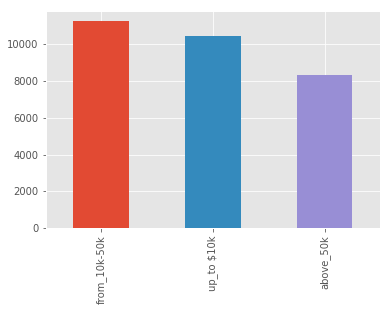

In [12]:
# Bar chart of the bins used for AVG_BILL_AMT

df['bin_AVG_BILL_AMT'].value_counts().plot(kind = "bar")

In [13]:
# Create AVG_PAY_AMT

df['AVG_PAY_AMT'] = ((df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3 + df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6)/6)


print((df['AVG_PAY_AMT']).head())

1     114.833336
2     833.333313
3    1836.333374
4    1398.000000
5    9841.500000
Name: AVG_PAY_AMT, dtype: float32


In [14]:
## Bin the AVG_PAY_AMT column and replace with Logical variables

labels = ["up_to $1,500", "from_$1,500-4,000", "above_$4,000"]
bins = [-165579, 1500, 4000, 2500000]
df['bin_AVG_PAY_AMT'] = pd.cut(df['AVG_PAY_AMT'], bins, labels = labels)
print(df['bin_AVG_PAY_AMT'].value_counts())
df = df.join(pd.get_dummies(df['bin_AVG_PAY_AMT'], prefix = 'AVG_PAY_AMT'))


above_$4,000         10432
up_to $1,500         10389
from_$1,500-4,000     9179
Name: bin_AVG_PAY_AMT, dtype: int64


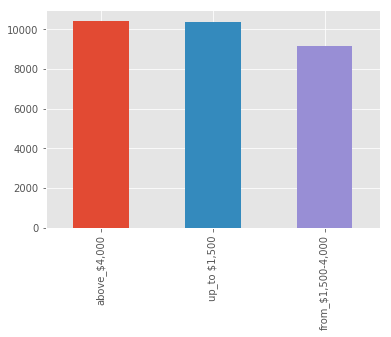

In [15]:
# Bar chart of the bins used for AVG_PAY_AMT

df['bin_AVG_PAY_AMT'].value_counts().plot(kind = "bar")

In [16]:
## Bin the LIMIT BAL column and replace with Logical variables

labels = ["<_80,000", "<=_200,0000", ">_200,000"]
bins = [0, 80000, 200000, 30000000]
df['binned'] = pd.cut(df['LIMIT_BAL'], bins, labels = labels)
print(df['binned'].value_counts())
df = df.join(pd.get_dummies(df['binned'], prefix = 'Limit Bal'))

<_80,000       10799
>_200,000       9622
<=_200,0000     9579
Name: binned, dtype: int64


2.0    14030
1.0    10585
3.0     4917
4.0      468
Name: EDUCATION, dtype: int64


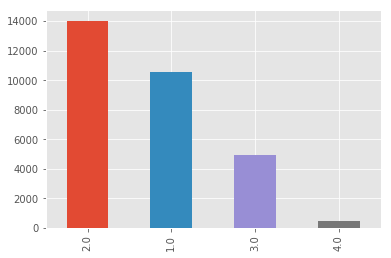

In [17]:
# Education values with scores of 5.0, 6.0 and 0.0 were replaces to the other category of 4.0
# Net result: 1 = Graduate School, 2 = University, 3 = High School, 4 = other

df.EDUCATION = df.EDUCATION.replace([5.0,6.0,0.0],4.0)
df.EDUCATION.value_counts().plot(kind = "bar")
print(df.EDUCATION.value_counts())

2.0    15964
1.0    13659
3.0      377
Name: MARRIAGE, dtype: int64


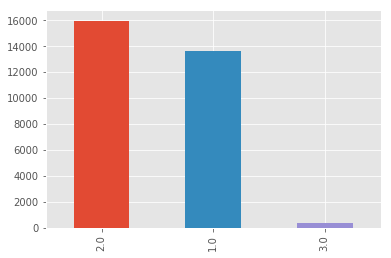

In [18]:
# Replace MARRIAGE values of 0 with 3

df.MARRIAGE = df.MARRIAGE.replace([0.0],3.0)
df.MARRIAGE.value_counts().plot(kind = "bar")
print(df.MARRIAGE.value_counts())

In [19]:
# Split dataset into training set and test set
# 70% training and 30% test

df_train, df_test = train_test_split(df, test_size=0.3, random_state=2019) 


In [20]:
print("***** df_train *****")
print(df_train.head())
print("\n")
print("***** df_test *****")
print(df_test.head())

***** df_train *****
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
20748   360000.0  1.0        2.0       1.0  36.0   -2.0   -2.0   -2.0   -2.0   
22071   100000.0  2.0        2.0       2.0  23.0    0.0    0.0    0.0    0.0   
3439    200000.0  2.0        1.0       1.0  34.0   -1.0   -1.0   -1.0   -1.0   
21757   270000.0  2.0        2.0       1.0  25.0    0.0    0.0    0.0    0.0   
7796    500000.0  2.0        1.0       1.0  38.0    0.0    0.0    0.0    2.0   

       PAY_5         ...           AVG_BILL_AMT_above_50k   AVG_PAY_AMT  \
20748   -2.0         ...                                0   2070.000000   
22071    0.0         ...                                0   5091.333496   
3439     0.0         ...                                0  10759.166992   
21757    0.0         ...                                1   5257.666504   
7796    -1.0         ...                                0  11717.333008   

         bin_AVG_PAY_AMT  AVG_PAY_AMT_up_to $1,

In [21]:
# For the train set
df_train.isna().head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,AVG_BILL_AMT_above_50k,AVG_PAY_AMT,bin_AVG_PAY_AMT,"AVG_PAY_AMT_up_to $1,500","AVG_PAY_AMT_from_$1,500-4,000","AVG_PAY_AMT_above_$4,000",binned,"Limit Bal_<_80,000","Limit Bal_<=_200,0000","Limit Bal_>_200,000"
20748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22071,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# For the test set
df_test.isna().head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,AVG_BILL_AMT_above_50k,AVG_PAY_AMT,bin_AVG_PAY_AMT,"AVG_PAY_AMT_up_to $1,500","AVG_PAY_AMT_from_$1,500-4,000","AVG_PAY_AMT_above_$4,000",binned,"Limit Bal_<_80,000","Limit Bal_<=_200,0000","Limit Bal_>_200,000"
9707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13035,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23848,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14913,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
print("*****In the df_train set*****")
print(df_train.isna().sum())
print("\n")
print("*****In the df_test set*****")
print(df_test.isna().sum())

*****In the df_train set*****
LIMIT_BAL                        0
SEX                              0
EDUCATION                        0
MARRIAGE                         0
AGE                              0
PAY_0                            0
PAY_2                            0
PAY_3                            0
PAY_4                            0
PAY_5                            0
PAY_6                            0
BILL_AMT1                        0
BILL_AMT2                        0
BILL_AMT3                        0
BILL_AMT4                        0
BILL_AMT5                        0
BILL_AMT6                        0
PAY_AMT1                         0
PAY_AMT2                         0
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
Y                                0
AVG_BILL_AMT                     0
OUTSTANDING_BAL1                 0
OUTSTANDING_BAL2                 0
OUTSTANDING_BAL3         

In [24]:
print("***** df_Train_Set *****")
print(df_train.describe())
print("\n")
print("***** df_Test_Set *****")
print(df_test.describe())

***** df_Train_Set *****
            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean    166933.796875      1.605952      1.847333      1.553619     35.518429   
std     129517.500000      0.488657      0.745562      0.521714      9.262934   
min      10000.000000      1.000000      1.000000      1.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      4.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.014857     -0.130810     -0.163190     -0.217857     -0.266810   
std     

In [25]:
print(df_train.columns.values)

['LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6' 'Y' 'AVG_BILL_AMT' 'OUTSTANDING_BAL1'
 'OUTSTANDING_BAL2' 'OUTSTANDING_BAL3' 'OUTSTANDING_BAL4'
 'OUTSTANDING_BAL5' 'OUTSTANDING_BAL6' 'AVG_OUT_BAL' 'PER_LIMIT_BAL1'
 'PER_LIMIT_BAL2' 'PER_LIMIT_BAL3' 'PER_LIMIT_BAL4' 'PER_LIMIT_BAL5'
 'PER_LIMIT_BAL6' 'AVG_PER_LIM_Bal' 'bin_AVG_BILL_AMT'
 'AVG_BILL_AMT_up_to $10k' 'AVG_BILL_AMT_from_10k-50k'
 'AVG_BILL_AMT_above_50k' 'AVG_PAY_AMT' 'bin_AVG_PAY_AMT'
 'AVG_PAY_AMT_up_to $1,500' 'AVG_PAY_AMT_from_$1,500-4,000'
 'AVG_PAY_AMT_above_$4,000' 'binned' 'Limit Bal_<_80,000'
 'Limit Bal_<=_200,0000' 'Limit Bal_>_200,000']


In [26]:
# Train to determine the impact of the Binned LIMIT_BAL scores on Defaulting "Y"

df_train[['binned', "Y"]].groupby([ df_train['binned'], ], as_index=False).mean()


,Y
0,0.305269
1,0.206417
2,0.149184


In [27]:
# Train to determine the impact of the EDUCATION scores on Defaulting "Y"
# Bins: 1 = Graduate School, 2 = University, 3 = High School, 4 = other

df_train[['EDUCATION', "Y"]].groupby([ df_train['EDUCATION'], ], as_index=False).mean()

,EDUCATION,Y
0,1.0,0.193623
1,2.0,0.242176
2,3.0,0.250944
3,4.0,0.066667


In [28]:
# Train to determine the impact of the MARRIAGE scores on Defaulting "Y"
# Bins: 1 = Married, 2 = Single, 3 = other

df_train[['MARRIAGE', "Y"]].groupby([ df_train['MARRIAGE'], ], as_index=False).mean()

,MARRIAGE,Y
0,1.0,0.239701
1,2.0,0.209730
2,3.0,0.231939


In [29]:
# Train to determine the impact of the AVG_BILL_AMT scores on Defaulting "Y"
# 3 bin ranges: "up_to $10k", "from_10k-50k", "above_50k"

df_train[['bin_AVG_BILL_AMT', "Y"]].groupby([ df_train['bin_AVG_BILL_AMT'], ], as_index=False).mean()

,Y
0,0.229506
1,0.232661
2,0.204178


In [30]:
# Train to determine the impact of the AVG_PAY_AMT scores on Defaulting "Y"
# 3 bin ranges: "up_to $1,500", "from_$1,500-4,000", "above_$4,000"

df_train[['bin_AVG_PAY_AMT', "Y"]].groupby([ df_train['bin_AVG_PAY_AMT'], ], as_index=False).mean()

,Y
0,0.307306
1,0.224635
2,0.137413


In [31]:
df_train.binned.head(5)

20748      >_200,000
22071    <=_200,0000
3439     <=_200,0000
21757      >_200,000
7796       >_200,000
Name: binned, dtype: category
Categories (3, object): [<_80,000 < <=_200,0000 < >_200,000]

In [32]:
# Train to determine the impact of the LIMIT BAL scores on Defaulting "Y"
# 3 bin ranges: "<_80,000", "<=_200,0000", ">_200,000"

df_train[['binned', "Y"]].groupby([ df_train['binned'], ], as_index=False).mean()


In [44]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(dfx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
correct = 0
for i in range(len(dfx)):
    predict_me = np.array(dfx[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(df))

KeyError: 0